<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_003_ANN_SET_20_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
ANN	       X_DAT_B_set_17_2019.csv	Y_DAT_B_set_17_2019.csv
imput_ANN.zip  X_DAT_set_17_2019.csv	Y_DAT_set_17_2019.csv
Hello world
I'm evolving!!!



In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def tasig(x,deriv=False):
    if(deriv==True):
        return 1-x*x
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# leitura dos dados
DAT=pd.read_csv("X_DAT_B_set_17_2019.csv")
DAT_Y=pd.read_csv("Y_DAT_B_set_17_2019.csv")

In [6]:
DAT_OLD=[]
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)

DAT_OLD_Y=[]
DAT_OLD_Y=DAT.copy()
DAT_Y=Normatiza(DAT_Y)
print(DAT_Y)

     Unnamed: 0        NP         F        CR
0     -1.000000  0.114354 -0.245588 -0.755935
1     -0.985075 -0.912669 -0.680108 -0.813692
2     -0.970149 -0.443377 -0.240085 -0.575476
3     -0.955224 -0.573045 -0.223235 -0.824112
4     -0.940299 -0.598857 -0.374451 -0.452080
5     -0.925373  0.059675 -0.319543 -0.919984
6     -0.910448 -0.760518  0.038647 -0.750100
7     -0.895522 -0.289433 -0.429079  0.484350
8     -0.880597 -0.771454 -0.065859 -0.837937
9     -0.865672 -0.295742 -0.268851 -0.575263
10    -0.850746  0.551790 -0.388656 -0.947452
11    -0.835821 -0.804261 -0.426380 -0.734796
12    -0.820896 -0.852609  0.160272 -0.178771
13    -0.805970  0.187260 -0.795653 -0.915505
14    -0.791045 -0.929527 -0.051578 -0.406839
15    -0.776119 -0.295742 -0.618089 -0.810144
16    -0.761194 -0.390380 -0.224206 -0.852651
17    -0.746269 -0.696189  0.659605  0.129538
18    -0.731343  0.114354 -0.245588 -0.755935
19    -0.716418 -0.912669 -0.680108 -0.813692
20    -0.701493 -0.443377 -0.24008

In [0]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=78) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
x_train=train.iloc[:,[1,2,3,4,5,6]]
x_test=test.iloc[:,[1,2,3,4,5,6]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,5,6]]
#print(x_train)

In [0]:
# obtem as variaveis dependentes (treino e teste)
train=DAT_Y.sample(frac=0.8,random_state=78) # poderia ser frac=0.5? sim ou nao?
test=DAT_Y.drop(train.index)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
#print(y_train)

In [0]:
Y_train=y_train
X_train=x_train

In [0]:
X_NOME=['DI RELATIVO','FRAC Its','VELOC FOBJ','VELOC X','DELTA FOBJ','DELTA VX']
Y_NOME=['CR']   

X_train=X_train.loc[X_train['DI RELATIVO']==X_train['DI RELATIVO'],X_NOME].values
y=Y_train.loc[Y_train['CR']==Y_train['CR'],['CR']].values


In [0]:

#Neuron_input=6
Neuron_input=len(X_NOME)
Neuron_hidden=8
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=500000

In [12]:
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1


for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 100000) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate



Epoch 0 error:0.8487814552599363
Epoch 100000 error:0.2663698555926286
Epoch 200000 error:0.24965420883111306
Epoch 300000 error:0.25978957722306956
Epoch 400000 error:0.26143799706391774


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


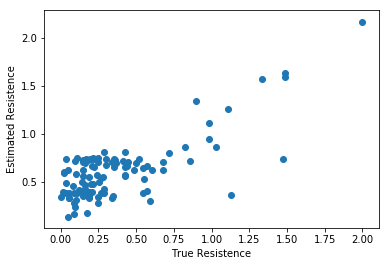

In [13]:
#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_train
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
#y_old=pd.DataFrame({'y_old':y_old})
Y_OLD=pd.DataFrame(Y_OLD)
Y_OLD.columns = ["y_calc"]
y_calc=Original(y_calc,Y_OLD)

y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)
y_obs_train=np.copy(y_obs)
y_calc_train=np.copy(y_calc)

plt.scatter(y_obs,y_calc)
plt.xlabel("True Resistence")
plt.ylabel("Estimated Resistence")
#plt.xlim((0,1))
#plt.ylim((0,1))
plt.show()
#'''

In [0]:
x_test=x_test.loc[x_test['DI RELATIVO']==x_test['DI RELATIVO'],X_NOME].values
#y=Y_test.loc[Y_test['Resistence']==Y_test['Resistence'],['Resistence']].values

In [0]:

#print(X_test)
l0 = x_test
l1 = sigmoid(np.dot(l0,syn0))
l2 = purelin(np.dot(l1,syn1))
y_calc_test=np.reshape(l2,len(l2))
y_calc_test=pd.DataFrame({'y_calc':y_calc_test})
y_calc_test=Original(y_calc_test,Y_OLD)

In [16]:
y_obs=y_test
y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


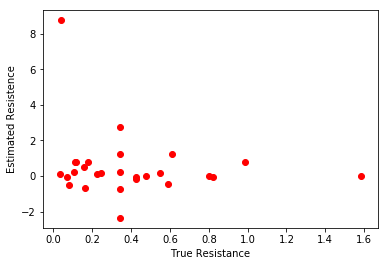

In [17]:
plt.scatter(y_obs,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.show()

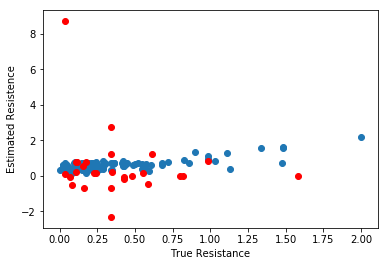

In [18]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.show()

In [19]:
print(y_obs,y_calc)

       y_calc
3    0.175888
12   0.821229
20   0.424524
23   0.080016
28   0.037841
29   0.344301
30   0.985257
32   0.550516
38   0.344301
40   0.161173
43   0.345273
54   0.110009
66   0.424394
68   0.589230
77   0.155862
78   0.225702
86   0.798815
89   0.243932
102  0.478634
105  0.107901
113  1.583139
114  0.117721
115  0.069357
116  0.340937
120  0.610426
123  0.033244
127  0.341640        y_calc
0    2.169570
1    0.327432
2    0.618338
3    0.661989
4    0.427744
5    0.750681
6    0.707634
7    0.652843
8    0.627462
9    0.702709
10   0.737977
11   1.570645
12   0.567667
13   0.495000
14   1.342843
15   0.797319
16   0.379159
17   0.334110
18   1.629863
19   0.741565
20   0.740530
21   0.500870
22   0.407550
23   0.720680
24   0.651278
25   0.384471
26   0.695177
27   0.338567
28   0.341758
29   0.458409
..        ...
78   0.546528
79   0.705684
80   0.605831
81   0.628619
82   0.297369
83   0.861291
84   0.738359
85   0.734774
86   0.341263
87   0.941568
88   0.349638
89   0

In [0]:
#print(l1)

In [0]:
#print(l2)